<h1><center>Laboratorio 4: La solicitud de Mathias 🤗</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo
- Nombre de alumno 2: Tamara Carrasco 


### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers.
- Utilizar diferentes algoritmos de cluster y ver el desempeño.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar clusters.
- Familiarizarse con plotly.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio

<center>
<img src="https://i.pinimg.com/originals/5a/a6/af/5aa6afde8490da403a21601adf7a7240.gif" width=400 />

En el corazón de las operaciones de Aerolínea Lucero, Mathias, el gerente de análisis de datos, reunió a un talentoso equipo de jóvenes científicos de datos para un desafío crucial: segmentar la base de datos de los clientes. “Nuestro objetivo es descubrir patrones en el comportamiento de los pasajeros que nos permitan personalizar servicios y optimizar nuestras campañas de marketing,” explicó Mathias, mientras desplegaba un amplio rango de datos que incluían desde hábitos de compra hasta opiniones sobre los vuelos.

Mathias encargó a los científicos de datos la tarea de aplicar técnicas avanzadas de clustering para identificar distintos segmentos de clientes, como los viajeros frecuentes y aquellos que eligen la aerolínea para celebrar ocasiones especiales. La meta principal era entender profundamente cómo estos grupos perciben la calidad y satisfacción de los servicios ofrecidos por la aerolínea.

A través de un enfoque meticuloso y colaborativo, los científicos de datos se abocaron a la tarea, buscando transformar los datos brutos en valiosos insights que permitirían a Aerolínea Lucero no solo mejorar su servicio, sino también fortalecer las relaciones con sus clientes mediante una oferta más personalizada y efectiva.

## Importamos librerias utiles 😸

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# importamos esto para el renderizado de vscode
import plotly.io as pio
pio.renderers.default = "notebook"  

## 1. Estudio de Performance 📈 [10 Puntos]



<center>
<img src="https://i.pinimg.com/originals/23/b7/6e/23b76e9e77e63c0eec1a7b28372369e3.gif" width=300>

Don Mathias les ha encomendado su primera tarea: analizar diversas técnicas de clustering. Su objetivo es entender detalladamente cómo funcionan estos métodos en términos de segmentación y eficiencia en tiempo de ejecución.

Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering (k-means, DBSCAN, Ward y GMM) aplicados a tres conjuntos de datos, incrementando progresivamente su tamaño. Utilice Plotly para las gráficas y discuta los resultados tanto cualitativa como cuantitativamente.

Uno de los requisitos establecidos por Mathias es que el análisis se lleve a cabo utilizando Plotly; de no ser así, se considerará incorrecto. Para facilitar este proceso, se ha proporcionado un código de Plotly que puede servir como base para realizar las gráficas. Apóyese en el código entregado para efectuar el análisis y tome como referencia la siguiente imagen para realizar los gráficos:

<img src='https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/Screenshot_2024-04-26_at_9.10.44_AM.png' width=800 />

En el gráfico se visualizan en dos dimensiones los diferentes tipos de datos proporcionados en `datasets`. Cada columna corresponde a un modelo de clustering diferente, mientras que cada fila representa un conjunto de datos distinto. Cada uno de los gráficos incluye el tiempo en segundos que tarda el análisis y la métrica Silhouette obtenida.

Para ser más específicos, usted debe cumplir los siguientes objetivos:
1. Generar una función que permita replicar el gráfico expuesto en la imagen (no importa que los colores calcen). [4 puntos]
2. Ejecuta la función para un `n_samples` igual a 1000, 5000, 10000. [2 puntos]
3. Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering utilizando las 3 configuraciones dadas en `n_samples`. [4 puntos]


> ❗ Tiene libertad absoluta de escoger los hiper parámetros de los cluster, sin embargo, se recomienda verificar el dominio de las variables para realizar la segmentación.

> ❗ Recuerde que es obligatorio el uso de plotly.


In [3]:
"""
En la siguiente celda se crean los datos ficticios a usar en la sección 1 del lab.
❗No realice cambios a esta celda a excepción de n_samples❗
"""

# Datos a utilizar

# Configuracion
n_samples = 5000 #Este parámetro si lo pueden modificar

def create_data(n_samples):

    # Lunas
    moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=30)
    # Blobs
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=172)
    # Datos desiguales
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    mutated = (np.dot(blobs[0], transformation), blobs[1])

    # Generamos Dataset
    dataset = {
        'moons':{
            'x': moons[0], 'classes': moons[1], 'n_cluster': 2
        },
        'blobs':{
            'x': blobs[0], 'classes': blobs[1], 'n_cluster': 3
        },
        'mutated':{
            'x': mutated[0], 'classes': mutated[1], 'n_cluster': 3
        }
    }
    return dataset

data_sets = create_data(n_samples)

In [9]:
data_sets

{'moons': {'x': array([[-0.91473477,  0.47183092],
         [ 0.33564745,  0.93585076],
         [ 0.26077813, -0.10283036],
         ...,
         [ 0.85387656,  0.60086271],
         [ 1.15089534, -0.46740749],
         [ 1.78622145, -0.17400986]], shape=(5000, 2)),
  'classes': array([0, 0, 1, ..., 0, 1, 1], shape=(5000,)),
  'n_cluster': 2},
 'blobs': {'x': array([[-3.17380029,  1.53068955],
         [-6.88168376, -6.58467153],
         [-3.43087735,  1.76154875],
         ...,
         [-7.31681746, -7.10386938],
         [ 2.6947934 ,  5.9823848 ],
         [-3.50789977,  4.44159211]], shape=(5000, 2)),
  'classes': array([1, 0, 1, ..., 0, 2, 1], shape=(5000,)),
  'n_cluster': 3},
 'mutated': {'x': array([[-2.516556  ,  3.12883182],
         [-1.49514164, -1.13872697],
         [-2.76314591,  3.46776541],
         ...,
         [-1.54854273, -1.29300502],
         [-0.77607788,  3.1690318 ],
         [-3.88137671,  5.65801355]], shape=(5000, 2)),
  'classes': array([1, 0, 1, ...,

**Respuestas:**

In [5]:
# importación de librerías para la fnción plot_scatter

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import  ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture 

# librería del tiempo

import time

# EN CASO DE QUE NO FUNCIONE PLOTLY:
import matplotlib.pyplot as plt



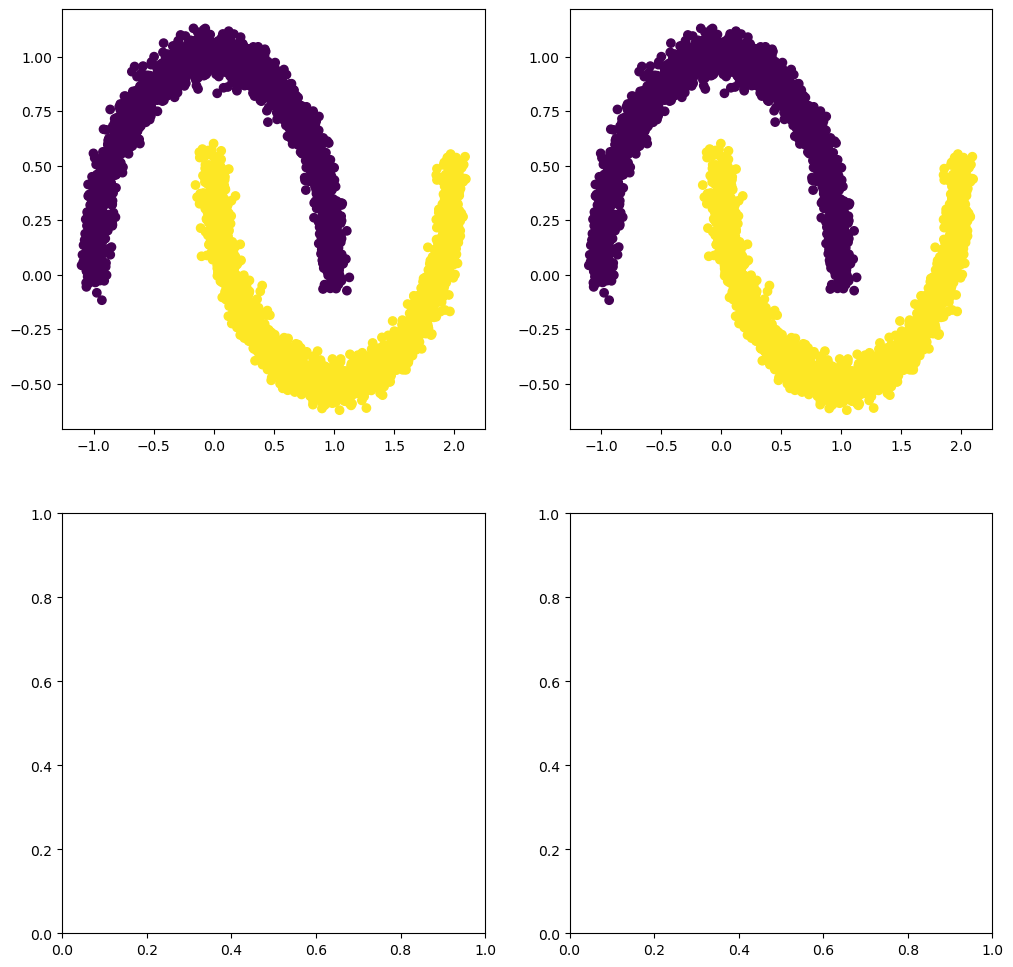

In [69]:
# kmeans_luna = KMeans(n_clusters=2, random_state=42) # n_clusters = 2 porque así lo dice el data_

dbscan = DBSCAN(eps=0.1, min_samples=4)
X = data_sets["moons"]["x"]
y = data_sets["moons"]["classes"]
y_pred = dbscan.fit_predict(X)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)

axs[0, 1].scatter(X[:, 0], X[:, 1], c=y)

In [91]:
def plot_scatter(x):
    """función que intenta recrear la figura de más arriba.
    
    POr ahora, que x sea una lista de los "x" de cada cluster, donde 
    índice 0 corresponde a las lunas, idx: 1 son los blobs e idx: 2
    son los mutated. 
    
    Parámetros originales
    --------------------------
    
    x: 
    
    y: 
    
    color: """

    #### Moons #####

    X_moons = x[0]

    # KMEANS

    kmeans_moons = KMeans(n_clusters=2, random_state=42)

    y_pred_km_moons = kmeans_moons.fit_predict(X_moons)

    # GMM

    gmm_moons = GaussianMixture(n_components=2, random_state=42)

    y_pred_gmm_moons = gmm_moons.fit_predict(X_moons)

    # WARD

    ward_moons = AgglomerativeClustering(n_clusters=2, linkage="ward")
    y_pred_ward_moons = ward_moons.fit_predict(X_moons ) 

    # DBSCAN

    dbscan_moons = DBSCAN(eps=0.1, min_samples=10)
    y_pred_dbscan_moons = dbscan_moons.fit_predict(X_moons) 

    #### BLOBS #####

    
    X_blobs = x[1]

    # KMEANS

    kmeans_blobs = KMeans(n_clusters=3, random_state=42)

    y_pred_km_blobs = kmeans_blobs.fit_predict(X_blobs)

    # GMM

    gmm_blobs = GaussianMixture(n_components=3, random_state=42)

    y_pred_gmm_blobs = gmm_blobs.fit_predict(X_blobs)

    # WARD

    ward_blobs = AgglomerativeClustering(n_clusters=3, linkage="ward")
    y_pred_ward_blobs = ward_blobs.fit_predict(X_blobs ) 

    # DBSCAN

    dbscan_blobs = DBSCAN(eps=0.5, min_samples=4)
    y_pred_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs) 

    #### MUTATED ####

    X_mut = x[2]

    # KMEANS

    kmeans_mut = KMeans(n_clusters=3, random_state=42)

    y_pred_km_mut = kmeans_mut.fit_predict(X_mut)

    # GMM

    gmm_mut = GaussianMixture(n_components=3, random_state=42)

    y_pred_gmm_mut = gmm_mut.fit_predict(X_mut)

    # WARD

    ward_mut= AgglomerativeClustering(n_clusters=3, linkage="ward")
    y_pred_ward_mut = ward_mut.fit_predict(X_mut) 

    # DBSCAN

    dbscan_mut = DBSCAN(eps=0.1, min_samples=20)
    y_pred_dbscan_mut = dbscan_mut.fit_predict(X_mut) 



    # Gráfico output

    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 12)) # gráfico con 3x3 subplots
    # fig.title("Comparación de tiempos de ejecución por técnica")

    ### MOONS ####
    axs[0, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_km_moons)
    axs[0, 0].set_title("KMEANS")

    axs[0, 1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_gmm_moons)
    axs[0, 1].set_title("GMM")

    axs[0, 2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_ward_moons)
    axs[0, 2].set_title("WARD")

    axs[0, 3].scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred_dbscan_moons)
    axs[0, 3].set_title("DBSCAN")

    ### BLOBS ###

    axs[1, 0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_km_blobs)
    

    axs[1, 1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_gmm_blobs)
    

    axs[1, 2].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_ward_blobs)
    

    axs[1, 3].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_dbscan_blobs)
    

    ### MUTATED ###

    axs[2, 0].scatter(X_mut[:, 0], X_mut[:, 1], c=y_pred_km_mut)
    

    axs[2, 1].scatter(X_mut[:, 0], X_mut[:, 1], c=y_pred_gmm_mut)
    

    axs[2, 2].scatter(X_mut[:, 0], X_mut[:, 1], c=y_pred_ward_mut)
    

    axs[2, 3].scatter(X_mut[:, 0], X_mut[:, 1], c=y_pred_dbscan_mut)
    


    plt.show()



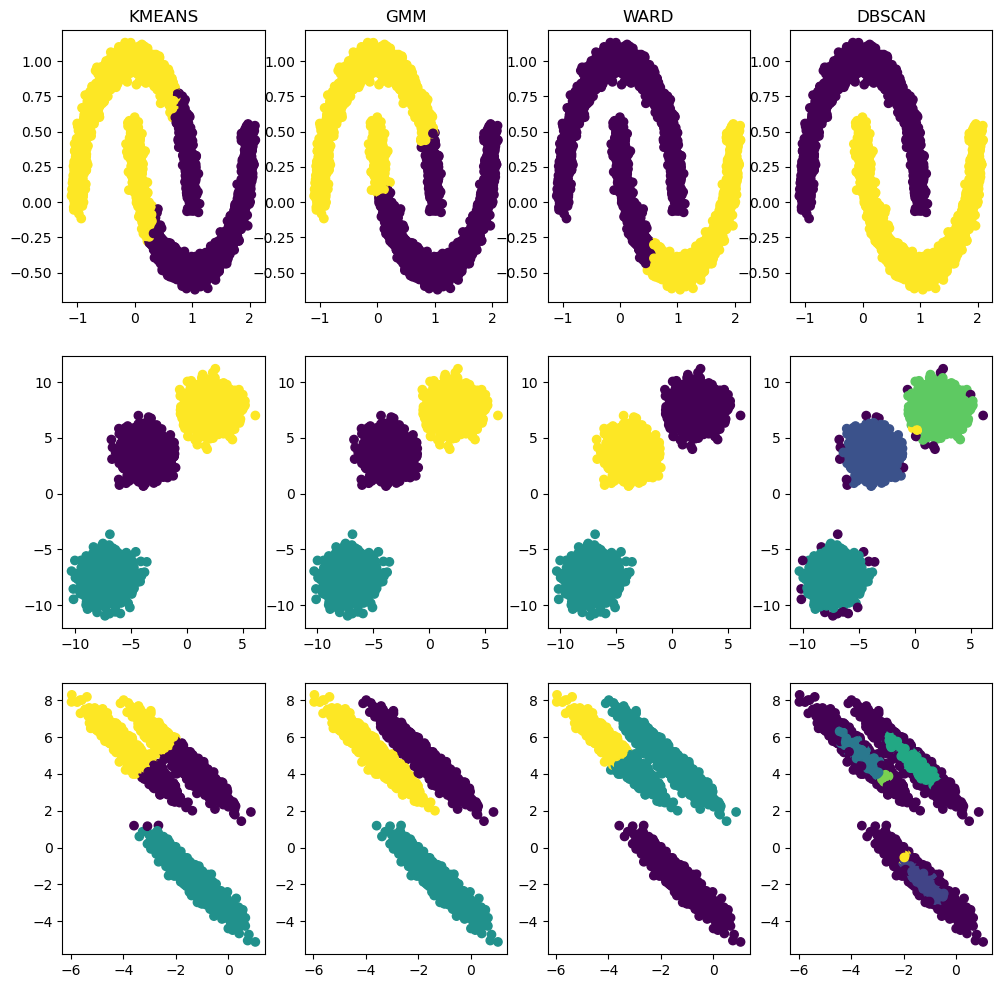

In [92]:
plot_scatter([data_sets["moons"]["x"], data_sets["blobs"]["x"], data_sets["mutated"]["x"]])

## 2. Análisis de Satisfacción de Vuelos. [10 puntos]

<center>
<img src="https://media4.giphy.com/media/v1.Y2lkPTZjMDliOTUyb3B5Y3BtbTZwMnB0ZXRyejFpanJkNDl5cGhoeWlsc2k5bGx1MTUwYSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l4FARHkIFJReGSy2c/giphy.gif" width=400 />

Habiendo entendido cómo funcionan los modelos de aprendizaje no supervisado, *Don Mathias* le encomienda estudiar la satisfacción de pasajeros al haber tomado un vuelo en alguna de sus aerolineas. Para esto, el magnate le dispone del dataset `aerolineas_licer.parquet`, el cual contiene el grado de satisfacción de los clientes frente a diferentes aspectos del vuelo. Las características del vuelo se definen a continuación:

- *Gender*: Género de los pasajeros (Femenino, Masculino)
- *Customer Type*: Tipo de cliente (Cliente habitual, cliente no habitual)
- *Age*: Edad actual de los pasajeros
- *Type of Travel*: Propósito del vuelo de los pasajeros (Viaje personal, Viaje de negocios)
- *Class*: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
- *Flight distance*: Distancia del vuelo de este viaje
- *Inflight wifi service*: Nivel de satisfacción del servicio de wifi durante el vuelo (0:No Aplicable; 1-5)
- *Departure/Arrival time convenient*: Nivel de satisfacción con la conveniencia del horario de salida/llegada
- *Ease of Online booking*: Nivel de satisfacción con la facilidad de reserva en línea
- *Gate location*: Nivel de satisfacción con la ubicación de la puerta
- *Food and drink*: Nivel de satisfacción con la comida y la bebida
- *Online boarding*: Nivel de satisfacción con el embarque en línea
- *Seat comfort*: Nivel de satisfacción con la comodidad del asiento
- *Inflight entertainment*: Nivel de satisfacción con el entretenimiento durante el vuelo
- *On-board service*: Nivel de satisfacción con el servicio a bordo
- *Leg room service*: Nivel de satisfacción con el espacio para las piernas
- *Baggage handling*: Nivel de satisfacción con el manejo del equipaje
- *Check-in service*: Nivel de satisfacción con el servicio de check-in
- *Inflight service*: Nivel de satisfacción con el servicio durante el vuelo
- *Cleanliness*: Nivel de satisfacción con la limpieza
- *Departure Delay in Minutes*: Minutos de retraso en la salida
- *Arrival Delay in Minutes*: Minutos de retraso en la llegada

En consideración de lo anterior, realice las siguientes tareas:

0. Ingeste el dataset a su ambiente de trabajo.

1. Seleccione **sólo las variables numéricas del dataset**.  Explique qué éfectos podría causar el uso de variables categóricas en un algoritmo no supervisado. [2 punto]

2. Realice una visualización de la distribución de cada variable y analice cada una de estas distribuciones. [2 punto]

3. Basándose en los gráficos, evalúe la necesidad de escalar los datos y explique el motivo de su decisión. [2 puntos]

4. Examine la correlación entre las variables mediante un correlograma. [2 puntos]

5. De acuerdo con los resultados obtenidos en 4, reduzca la dimensionalidad del conjunto de datos a cuatro variables, justificando su elección respecto a las variables que decide eliminar. [2 puntos]

**Respuesta:**

In [ ]:
# Carga de datos

## 3. Preprocesamiento 🎭. [10 puntos]

<center>
<img src="https://media.tenor.com/R_WseIIwQ8QAAAAM/beavis-computer.gif" width=400>

Tras quedar satisfecho con los resultados presentados en el punto 2, el dueño de la empresa ha solicitado que se preprocesen los datos mediante un `pipeline`. Es crucial que este proceso tenga en cuenta las observaciones derivadas de los análisis anteriores. Adicionalmente, ha expresado su interés en visualizar el conjunto de datos en un gráfico de dos o tres dimensiones.

Basándose en los análisis realizados anteriormente:
1. Cree un `pipeline` que incluya PCA, utilizando las consideraciones mencionadas previamente para proyectar los datos a dos dimensiones. [4 puntos]
2. Grafique los resultados obtenidos y comente lo visualizado. [6 puntos]

**Respuestas:**

In [ ]:
# Escriba su código aquí

## 4. Outliers 🚫🙅‍♀️❌🙅‍♂️ [10 puntos]

<center>
<img src="https://joachim-gassen.github.io/images/ani_sim_bad_leverage.gif" width=250>

Con el objetivo de mantener la claridad en su análisis, Don Mathias le ha solicitado entrenar un modelo que identifique pasajeros con comportamientos altamente atípicos.

1. Utilice `IsolationForest` para clasificar las anomalías del dataset (sin aplicar PCA), configurando el modelo para que sólo el 1% de los datos sean considerados anómalos. Asegúrese de integrar esta tarea dentro de un `pipeline`. [3 puntos]

2. Visualice los resultados en el gráfico de dos dimensiones previamente creado. [3 puntos]

3. ¿Cómo evaluaría el rendimiento de su modelo en la detección de anomalías? [4 puntos]

**Respuestas:**

In [ ]:
# Escriba su código aquí

## 5. Métricas de Desempeño 🚀 [10 puntos]

<center>
<img src="https://i.imgflip.com/6xz0ij.gif" width=400>

Motivado por incrementar su fortuna, Don Mathias le solicita entrenar un modelo que le permita segmentar a los pasajeros en grupos distintos, con el objetivo de optimizar las diversas campañas de marketing diseñadas por su equipo. Para ello, le se pide realizar las siguientes tareas:

1. Utilizar el modelo **Gaussian Mixture** y explore diferentes configuraciones de número de clústers, específicamente entre 3 y 8. Asegúrese de integrar esta operación dentro de un `pipeline`. [4 puntos]
2. Explique cuál sería el criterio adecuado para seleccionar el número óptimo de clústers. **Justifique de forma estadistica y a traves de gráficos.** [6 puntos]

> **HINT:** Se recomienda investigar sobre los criterios AIC y BIC para esta tarea.

**Respuestas:**

In [ ]:
# Escriba su código aquí

## 6. Análisis de resultados 📊 [10 puntos]

<center>
<img src="https://i.pinimg.com/originals/5b/03/4e/5b034e96d84c6c6b57a9a04ca14aac02.gif" width=400>

Una vez identificado el número óptimo de clústers, se le pide realizar lo siguiente:

1. Utilizar la proyección en dos dimensiones para visualizar cada clúster claramente. [2 puntos]

2. ¿Es posible distinguir claramente entre los clústers generados? [2 puntos]

3. Proporcionar una descripción breve de cada clúster utilizando estadísticas descriptivas básicas, como la media y la desviación estándar, para resumir las características de las variables utilizadas en estos algoritmos. [2 puntos]

4. Proceda a visualizar los clústers en tres dimensiones para una perspectiva más detallada. [2 puntos]

5. ¿Cómo afecta esto a sus conclusiones anteriores? [2 puntos]

**Respuestas:**

In [ ]:
# Escriba su código aquí

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>